In [97]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import os


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import env

ModuleNotFoundError: No module named 'env'

# Acquire

Creating initial functions related to acquisition of the dataset to be used. Using these functions I will build out an acquire.py file that I can use in my final report.


In [2]:
def get_telco_data():
    ''' This function allows access to the requisite telco dataset. It accesses a local cache of the data if there is a 
    local copy stored. If no local copy exists, it uses credentials stored in env.py to make a call to the SQL 
    database, returns the data and then creates a local cached copy in a .csv file so as to not need to query the SQL 
    database in the future. 
    
    The stored local copy is called telco.csv 
    
    If at any point a fresh copy of the SQL database is needed, the original cached .csv must be deleted.
    
    The function returns a dataframe of the telco data.
    '''
    
    filename = "telco.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        query = '''
        SELECT * 
        FROM customers
        JOIN contract_types USING (contract_type_id)
        JOIN payment_types USING (payment_type_id)
        JOIN internet_service_types USING (internet_service_type_id);     
        '''
        url = env.get_db_url('telco_churn')
        df = pd.read_sql(query, url)
        df.to_csv(filename, index=False)

        return df  
    
df = get_telco_data()
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [3]:
df.shape

(7043, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
# Small function getting me a value_count of all object columns; this gives me a preliminary look at the data.

def obj_val_cnt(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(df[col].value_counts(dropna=False))
obj_val_cnt(df)

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: partner, dtype: int64
No     4933
Yes    2110
Name: dependents, dtype: int64
Yes    6361
No      682
Name: phone_service, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Na

**Above we see that the total_charges column is treated as an object, I need to fix this and deal with any possible nulls as soon as possible before looking at any of the data.  This is a prepare task that will be done below and added to the prepare.py script.**

In [7]:
# This function gives me a dataframe with summary statistics with range added on the end.

def describe_with_range(df):
    summary_stats = df.describe().T
    summary_stats['range'] = summary_stats['max'] - summary_stats['min']
    return summary_stats
describe_with_range(df)

,count,mean,std,min,25%,50%,75%,max,range
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00,2.0
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00,3.0
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00,2.0
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00,1.0
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00,72.0
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75,100.5


# Prepare
Doing some initial exploration of the dataframe will allow me to find any data that needs to be changed, converted or transformed for use in the model later.  Some of these functions will go into my prepare.py script.

In [8]:
# This follows my discovery above about the total_charges column being an object column.

# This finds all "nulls" which take the form of an empty space ' ' here since this is an object column, and replaces 
# them with zeros and then converts the column to a numeric one.

df.total_charges.replace(' ', '0', inplace=True)
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

In [9]:
# Based on the df.info() above I don't think there are any nulls, but the following will show us if there are.

df.isnull().sum()

internet_service_type_id    0
payment_type_id             0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
payment_type                0
internet_service_type       0
dtype: int64

In [10]:
df.internet_service_type.value_counts(), df.internet_service_type_id.value_counts()

(Fiber optic    3096
 DSL            2421
 None           1526
 Name: internet_service_type, dtype: int64,
 2    3096
 1    2421
 3    1526
 Name: internet_service_type_id, dtype: int64)

In [11]:
df.payment_type_id.value_counts(), df.payment_type.value_counts()

(1    2365
 2    1612
 3    1544
 4    1522
 Name: payment_type_id, dtype: int64,
 Electronic check             2365
 Mailed check                 1612
 Bank transfer (automatic)    1544
 Credit card (automatic)      1522
 Name: payment_type, dtype: int64)

In [12]:
df.contract_type_id.value_counts(), df.contract_type.value_counts()

(1    3875
 3    1695
 2    1473
 Name: contract_type_id, dtype: int64,
 Month-to-month    3875
 Two year          1695
 One year          1473
 Name: contract_type, dtype: int64)

In [13]:
df.phone_service.value_counts(), df.multiple_lines.value_counts()

(Yes    6361
 No      682
 Name: phone_service, dtype: int64,
 No                  3390
 Yes                 2971
 No phone service     682
 Name: multiple_lines, dtype: int64)

In [14]:
df[(df.phone_service == 'No') & (df.multiple_lines == 'No phone service')].phone_service.value_counts()

No    682
Name: phone_service, dtype: int64

In [15]:
# From the above 4 cells we see that the columns internet_service_type, payment_type, and contract_type all correspond
# direclty to internet_service_type_id, payment_type_id, and contract_type_id; additionally, the information in the 
# phone_service column is 100% reproduced with ADDITIONALY info in the multiple_lines column.  Thus I will be dropping 
# internet_service_type_id, payment_type_id, contract_type_id, and phone_service as redundant columns.

df.drop(columns = ['internet_service_type_id', 'payment_type_id', 'contract_type_id', 'phone_service'], inplace=True)

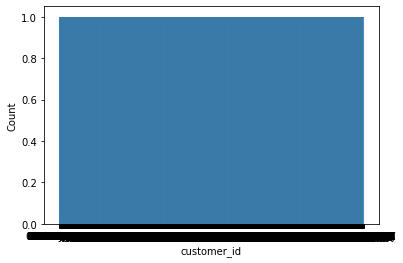

Count of variables in customer_id: 
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
--------------------


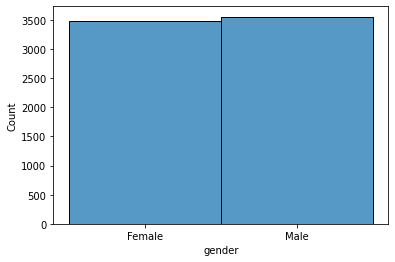

Count of variables in gender: 
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------


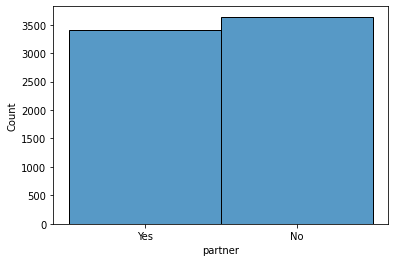

Count of variables in partner: 
No     3641
Yes    3402
Name: partner, dtype: int64
--------------------


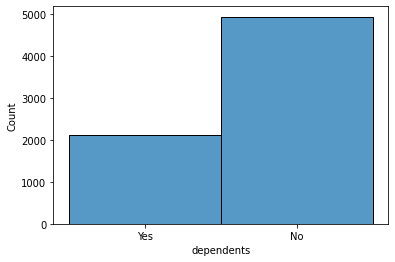

Count of variables in dependents: 
No     4933
Yes    2110
Name: dependents, dtype: int64
--------------------


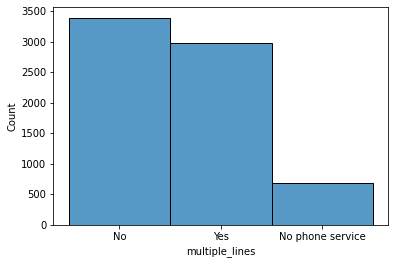

Count of variables in multiple_lines: 
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
--------------------


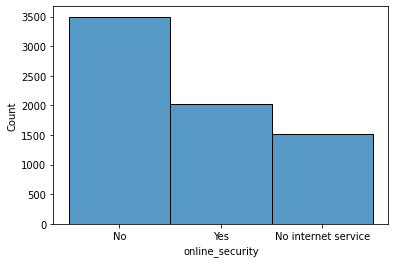

Count of variables in online_security: 
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
--------------------


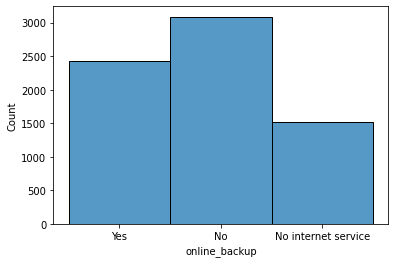

Count of variables in online_backup: 
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64
--------------------


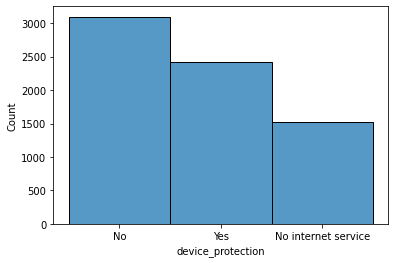

Count of variables in device_protection: 
No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64
--------------------


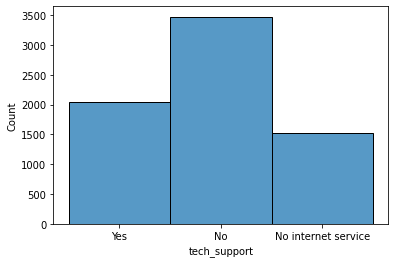

Count of variables in tech_support: 
No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64
--------------------


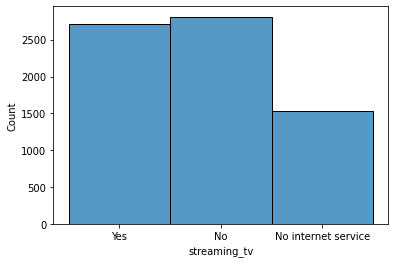

Count of variables in streaming_tv: 
No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64
--------------------


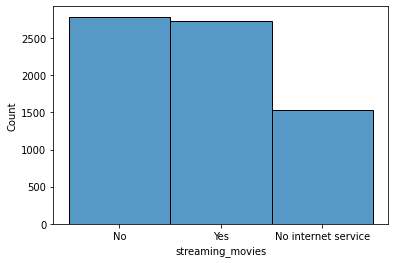

Count of variables in streaming_movies: 
No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64
--------------------


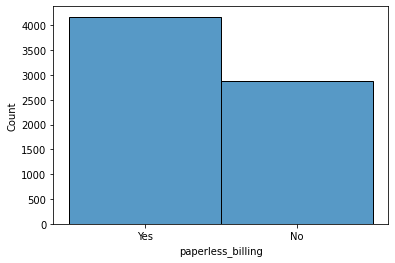

Count of variables in paperless_billing: 
Yes    4171
No     2872
Name: paperless_billing, dtype: int64
--------------------


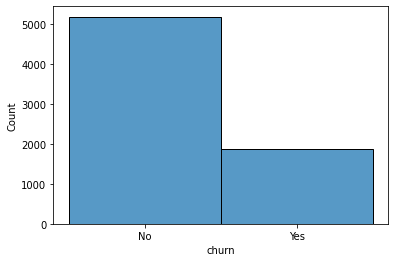

Count of variables in churn: 
No     5174
Yes    1869
Name: churn, dtype: int64
--------------------


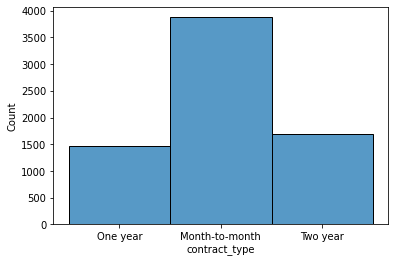

Count of variables in contract_type: 
Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64
--------------------


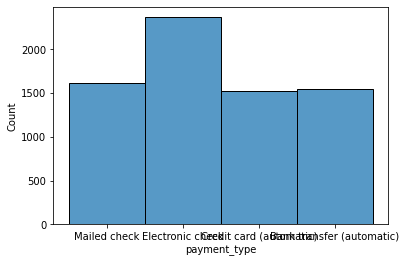

Count of variables in payment_type: 
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64
--------------------


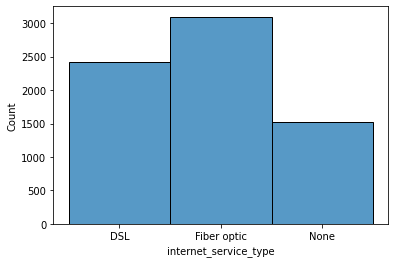

Count of variables in internet_service_type: 
Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64
--------------------


In [16]:
# Getting histograms for each of the categorical columns in the telco dataset.  This will give me a good sense of how 
# each categorical column is shaped.
cat_cols = df.select_dtypes('object').columns

for col in cat_cols:
    sns.histplot(df[col])
    plt.show()
    print(f"Count of variables in {col}: \n{df[col].value_counts()}\n--------------------")

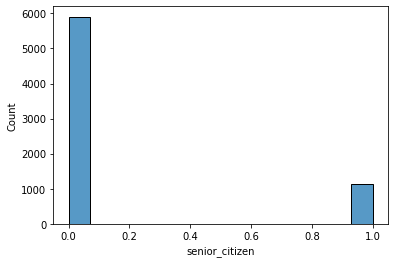

Count of variables in senior_citizen: 
0    5901
1    1142
Name: senior_citizen, dtype: int64
--------------------
Mean of variables in senior_citizen: 
0.1621468124378816
--------------------


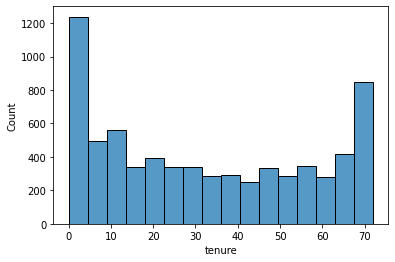

Count of variables in tenure: 
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
--------------------
Mean of variables in tenure: 
32.37114865824223
--------------------


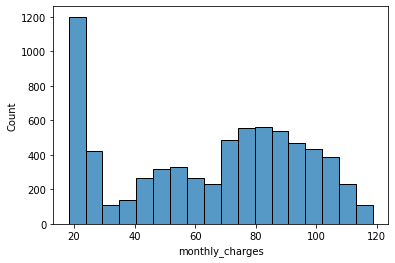

Count of variables in monthly_charges: 
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: monthly_charges, Length: 1585, dtype: int64
--------------------
Mean of variables in monthly_charges: 
64.76169246059918
--------------------


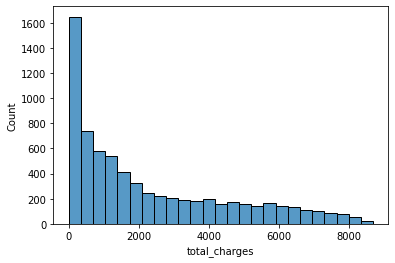

Count of variables in total_charges: 
0.00       11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6531, dtype: int64
--------------------
Mean of variables in total_charges: 
2279.7343035638223
--------------------


In [17]:
# This gets us some preliminary histograms of the numeric columns in the dataset.  This gives me an idea of how the 
# numerical columns are shaped.
num_cols = df.select_dtypes('number').columns

for col in num_cols:
    sns.histplot(df[col])
    plt.show()
    print(f"Count of variables in {col}: \n{df[col].value_counts()}\n--------------------")
    print(f"Mean of variables in {col}: \n{df[col].mean()}\n--------------------")

In [18]:
# From the above cell, we can see there are 11 total customers who have 0 total_charges and 11 total customers who
# have a tenure of 0. I want to compare those both to churn to determine if those 11 customers are worth keeping.

df[df.total_charges == 0]

# None churned who had a tenure of total charges and tenure of 0. Since they have no possiblity of churning yet, I'm 
# going to drop these eleven customers from the dataset as to make the data cleaner.

,customer_id,gender,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
945,1371-DWPAZ,Female,0,Yes,Yes,0,No phone service,Yes,Yes,Yes,Yes,Yes,No,No,56.05,0.0,No,Two year,Credit card (automatic),DSL
1731,2520-SGTTA,Female,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,0.0,No,Two year,Mailed check,None
1906,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,Yes,No,Yes,No,No,Yes,61.90,0.0,No,Two year,Bank transfer (automatic),DSL
2025,2923-ARZLG,Male,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.70,0.0,No,One year,Mailed check,None
2176,3115-CZMZD,Male,0,No,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,0.0,No,Two year,Mailed check,None
2250,3213-VVOLG,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,0.0,No,Two year,Mailed check,None
2855,4075-WKNIU,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,0.0,No,Two year,Mailed check,DSL
3052,4367-NUYAO,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,0.0,No,Two year,Mailed check,None
3118,4472-LVYGI,Female,0,Yes,Yes,0,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,0.0,No,Two year,Bank transfer (automatic),DSL
4054,5709-LVOEQ,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,No,Yes,Yes,No,80.85,0.0,No,Two year,Mailed check,DSL


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [20]:
df.drop(df[df.total_charges == 0].index, inplace=True)
df.info()
# Dropped 11 customers. Total rows from 7043 to 7032

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7032 non-null   object 
 1   gender                 7032 non-null   object 
 2   senior_citizen         7032 non-null   int64  
 3   partner                7032 non-null   object 
 4   dependents             7032 non-null   object 
 5   tenure                 7032 non-null   int64  
 6   multiple_lines         7032 non-null   object 
 7   online_security        7032 non-null   object 
 8   online_backup          7032 non-null   object 
 9   device_protection      7032 non-null   object 
 10  tech_support           7032 non-null   object 
 11  streaming_tv           7032 non-null   object 
 12  streaming_movies       7032 non-null   object 
 13  paperless_billing      7032 non-null   object 
 14  monthly_charges        7032 non-null   float64
 15  tota

In [21]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7032 non-null   object 
 1   gender                 7032 non-null   object 
 2   senior_citizen         7032 non-null   int64  
 3   partner                7032 non-null   object 
 4   dependents             7032 non-null   object 
 5   tenure                 7032 non-null   int64  
 6   multiple_lines         7032 non-null   object 
 7   online_security        7032 non-null   object 
 8   online_backup          7032 non-null   object 
 9   device_protection      7032 non-null   object 
 10  tech_support           7032 non-null   object 
 11  streaming_tv           7032 non-null   object 
 12  streaming_movies       7032 non-null   object 
 13  paperless_billing      7032 non-null   object 
 14  monthly_charges        7032 non-null   float64
 15  tota

In [23]:
# Makes a list for categorical columns which we want encoded for modeling later 
# (this will be a list of all categorical columns except customer_id)

dummies_list = df.select_dtypes(object).columns
dummies_list = dummies_list.drop('customer_id')

dummy_df = pd.get_dummies(df[dummies_list], drop_first=True)
df = pd.concat([df, dummy_df], axis = 1)

In [24]:
# We can see here the categorical columns have been properly encoded.
df.head(1).T

,0
customer_id,0002-ORFBO
gender,Female
senior_citizen,0
partner,Yes
dependents,Yes
tenure,9
multiple_lines,No
online_security,No
online_backup,Yes
device_protection,No


In [25]:
def split_telco(df):
    '''
    Takes in a cleaned telco dataframe, splits it into train, validate and test subgroups stratifying it on the target
    of churn and then returns those subgroups.
    
    Arguments: df - a cleaned pandas dataframe with the expected feature names and columns in the telco dataset
    Return: train, validate, test - dataframes ready for the exploration and model phases.
    '''
    train, test = train_test_split(df, train_size = 0.8, stratify = df.churn_Yes, random_state = 1234)
    train, validate = train_test_split(train, train_size = 0.7, stratify = train.churn_Yes, random_state = 1234)
    return train, validate, test

train, validate, test = split_telco(df)

In [26]:
train.shape, validate.shape, test.shape

((3937, 46), (1688, 46), (1407, 46))

In [27]:
# This shows the proportion of each subgroup which contains a customer who churns.  They are all essentially 
# equivalent.

train.churn_Yes.mean(), validate.churn_Yes.mean(), test.churn_Yes.mean()

(0.2656845313690627, 0.2659952606635071, 0.2658137882018479)

In [28]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
4491,6339-RZCBJ,Male,0,No,No,48,No,No,Yes,Yes,...,1,0,0,0,1,1,0,0,0,0
2346,3359-DSRKA,Female,0,Yes,Yes,58,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,0,1,0,1
770,1121-QSIVB,Female,0,No,Yes,44,Yes,No,Yes,No,...,1,1,0,1,0,0,0,1,0,0
5155,7249-WBIYX,Male,0,Yes,No,10,Yes,No,No,No,...,0,1,1,0,0,0,1,0,1,0
189,0305-SQECB,Female,0,No,Yes,11,No phone service,Yes,No,No,...,0,1,0,1,0,0,0,1,0,0


Data is now split into 3 subgroups with the target variable churn stratified amongst them.

# Explore (Exploratory Data Analysis)
This is where I will be doing more in depth univariate, bivariate, and multivariate exploration of the data to determine what are features of the target variable churn that I want to use for my model.

In [61]:
plt.rc('figure', figsize=(14, 10))

In [34]:
train_explore = train.drop(columns = ['customer_id', 'gender_Male',
       'partner_Yes', 'dependents_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'paperless_billing_Yes', 'churn_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'internet_service_type_Fiber optic',
       'internet_service_type_None'])

In [35]:
train_explore.head(1).T

,4491
gender,Male
senior_citizen,0
partner,No
dependents,No
tenure,48
multiple_lines,No
online_security,No
online_backup,Yes
device_protection,Yes
tech_support,Yes


### Continous Variables
Exploring continous variables

<AxesSubplot:>

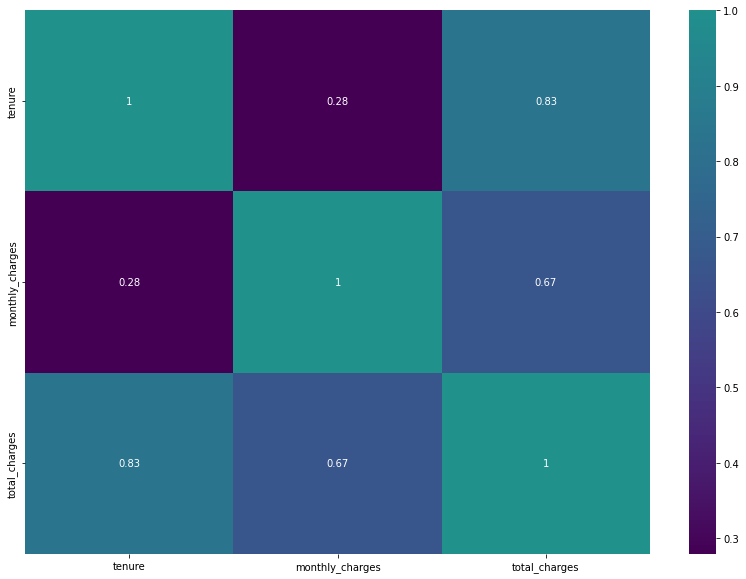

In [52]:
# Viewing all continuous data in a heatmap to see if there is any strong correlation present between features.

sns.heatmap(train_explore.drop('senior_citizen', axis=1).corr(), cmap='viridis', center=1, annot=True)

# It looks as though tenure and total_charges might be interrelated so depending on how the models perform later, I may want to 
# exclude 

#### Takeaways from Heatmap:
- There are not many continuous variables to compare in the Telco dataset as most are categorical variables.
- Of the three that remain, tenure and total_charges are correlated most strongly 
    - depending on how the models perform later, I may want to exclude either tenure or total charges to see if this makes a clearer picture for the model to predict on.


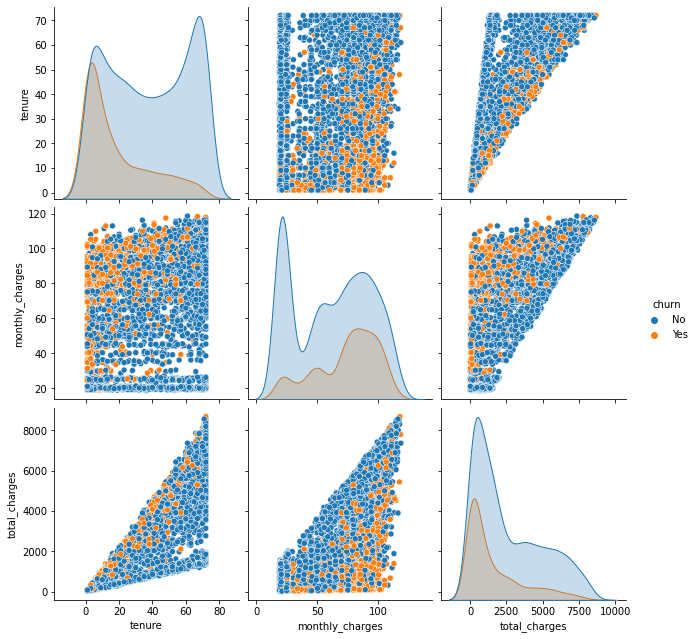

In [69]:
sns.pairplot(train_explore.drop('senior_citizen', axis=1), hue='churn', height = 3)
plt.show()

#### Takeaways from pairplot:
- It looks as though there are significant differences between churn and no churn for all of the given features: total_charges, monthly_charges, and tenure.
- It also looks like higher monthly charges and lower tenure may be a driver for churn.
- I will need to hypothesis test these.

**Hypothesis testing for continous variables**

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

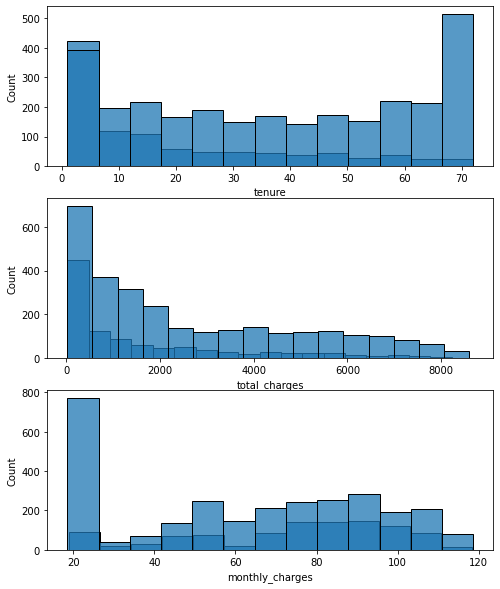

In [80]:
# I want to compare these continous variables with a T-test.  Checking for normality in graphs below.
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
sns.histplot(data=train_explore[train_explore.churn == 'Yes'].tenure)
sns.histplot(data=train_explore[train_explore.churn == 'No'].tenure)
plt.subplot(3,1,2)
sns.histplot(data=train_explore[train_explore.churn == 'Yes'].total_charges)
sns.histplot(data=train_explore[train_explore.churn == 'No'].total_charges)
plt.subplot(3,1,3)
sns.histplot(data=train_explore[train_explore.churn == 'Yes'].monthly_charges)
sns.histplot(data=train_explore[train_explore.churn == 'No'].monthly_charges)

In [96]:
print(f"The total entries for churn is: {train_explore[train_explore.churn == 'Yes'].shape[0]}.")
print(f"The total entries for no churn is: {train_explore[train_explore.churn == 'No'].shape[0]}.")

The total entries for churn is: 1046.
The total entries for no churn is: 2891.


In [101]:
# Checking for variance with levene

stats.levene(train_explore[train_explore.churn == 'Yes'].tenure, train_explore[train_explore.churn == 'No'].tenure)
# No equal variance for tenure.

LeveneResult(statistic=208.2260074776894, pvalue=4.918222765354178e-46)

In [103]:
stats.levene(train_explore[train_explore.churn == 'Yes'].total_charges, train_explore[train_explore.churn == 'No'].total_charges)
# No equal variance for total_charges.

LeveneResult(statistic=85.78117491510639, pvalue=3.220782732845082e-20)

In [104]:
stats.levene(train_explore[train_explore.churn == 'Yes'].monthly_charges, train_explore[train_explore.churn == 'No'].monthly_charges)
# No equal variance for monthly_charges

LeveneResult(statistic=161.54749042499748, pvalue=2.6620656867750108e-36)

For my t-tests:
- Even though the graphs aren't normal, they are large enough to assume normality due to the central limit theorem.
- They are independent of one another by definition.
- None of the variables have equal variance when split between churn and no churn. I will set equal_var=False.

I will run a two sample, two tailed t-test for each continous variable to see if there is any signficant difference between churn and no churn.

**Hypothesis 1:**

$H_{0}$ There is no difference in tenure between customers who churned and customers who didn't churn.

$H_{a}$ There is a statistically significant difference in tenure between customers who churned and customers who didn't churn.

In [105]:
alpha = .05

In [107]:
t, p = stats.ttest_ind(train_explore[train_explore.churn == 'Yes'].tenure, train_explore[train_explore.churn == 'No'].tenure, equal_var=False)

t, p

(-25.10180881507048, 1.0184830572431322e-122)

In [108]:
p < alpha

True

Reject the Null; There is a statistically significant difference in tenure between customers who churned and customers who didn't churn.


**Hypothesis 2:**

$H_{0}$ There is no difference in monthly_charges between customers who churned and customers who didn't churn.

$H_{a}$ There is a statistically significant difference in monthly_charges between customers who churned and customers who didn't churn.

In [110]:
t, p = stats.ttest_ind(train_explore[train_explore.churn == 'Yes'].monthly_charges, train_explore[train_explore.churn == 'No'].monthly_charges, equal_var=False)

t, p

(12.072008878640396, 1.4724622662838922e-32)

In [111]:
p < alpha

True

Reject the Null; There is a statistically significant difference in monthly_charges between customers who churned and customers who didn't churn.


**Hypothesis 3:**

$H_{0}$ There is no difference in total_charges between customers who churned and customers who didn't churn.

$H_{a}$ There is a statistically significant difference in total_charges between customers who churned and customers who didn't churn.

In [112]:
t, p = stats.ttest_ind(train_explore[train_explore.churn == 'Yes'].total_charges, train_explore[train_explore.churn == 'No'].total_charges, equal_var=False)

t, p

(-13.516671842845568, 4.576798001002562e-40)

In [113]:
p < alpha

True

Reject the Null; There is a statistically significant difference in monthly_charges between customers who churned and customers who didn't churn.


**Results from t-tests of continous variables**

- All continous variables when split between customers who churned and didn't churn show statistically significant differences.
- Tenure had the strongest results.
- I will use all continuous variables as features for modeling.

### Categorical Variables
Exploring Categorical variables